<a href="https://colab.research.google.com/github/Dongju5/QuantVerse/blob/main/%EC%A1%B0%ED%98%9C%EC%A7%84/%EC%82%B0%EC%97%85%EB%B6%84%EC%84%9D_%EA%B0%80%EC%A4%91%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (40.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

In [1]:
import pandas as pd

# 데이터 로드
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목별 산업 포함
financial_data = pd.read_csv('filtered_financial_pivot.csv')  # 재무제표 데이터

# 산업 정보 병합
merged_data = pd.merge(financial_data, kospi_200[['stock_code', 'industry']], on='stock_code', how='left')

# 데이터 확인
print(merged_data.head())


  corp_name_x  stock_code          날짜 금융부채 금융상품관련순손익 기타포괄손익-공정가치측정금융자산  \
0      BGF리테일      282330  2020-05-15    0         0                 0   
1      BGF리테일      282330  2020-08-14    0         0                 0   
2      BGF리테일      282330  2020-11-16    0         0                 0   
3      BGF리테일      282330  2021-03-17    0         0                 0   
4      BGF리테일      282330  2021-05-17    0         0                 0   

  당기손익-공정가치측정금융자산         당기순이익        당기순이익(손실)           매출액  ... 차입부채  \
0               0  1.200685e+10   12,006,847,104  1.393052e+12  ...    0   
1               0  3.304319e+10   33,043,190,898  1.549208e+12  ...    0   
2               0  5.149767e+10   51,497,670,068  1.682728e+12  ...    0   
3               0  1.227113e+11  122,711,267,434  6.181269e+12  ...    0   
4               0  1.587135e+10   15,871,350,141  1.501236e+12  ...    0   

  총포괄손익 파생상품관련손익  파생상품부채 파생상품자산   매출액_증가율     영업이익률    자산_부채비율        ROE  \
0     0        0     

In [5]:
# 기본 정보 출력 및 결측값 확인
print(merged_data.info())
print(merged_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   corp_name_x        3169 non-null   object 
 1   stock_code         3169 non-null   int64  
 2   날짜                 3169 non-null   object 
 3   금융부채               3169 non-null   object 
 4   금융상품관련순손익          3169 non-null   object 
 5   기타포괄손익-공정가치측정금융자산  3169 non-null   object 
 6   당기손익-공정가치측정금융자산    3169 non-null   object 
 7   당기순이익              3169 non-null   float64
 8   당기순이익(손실)          3169 non-null   object 
 9   매출액                3169 non-null   float64
 10  법인세차감전 순이익         3169 non-null   object 
 11  보험계약부채             3169 non-null   object 
 12  보험계약자산             3169 non-null   object 
 13  부채총계               3169 non-null   int64  
 14  비유동부채              3169 non-null   object 
 15  비유동자산              3169 non-null   object 
 16  상각후원가측정금융자산        3169 

In [2]:
# 주요 지표 선택
selected_columns = [
    'industry', '매출액', '영업이익', '영업이익률', 'ROE',
    '부채총계', '자산총계', '매출액_증가율', '자산_부채비율'
]

# 필요한 데이터 추출
selected_data = merged_data[selected_columns]

# 데이터 확인
print(selected_data.head())


  industry           매출액          영업이익     영업이익률        ROE           부채총계  \
0      유통업  1.393052e+12  1.847880e+10  1.326497   2.042992  1591177783149   
1      유통업  1.549208e+12  4.456064e+10  2.876349   5.323177  1626271198512   
2      유통업  1.682728e+12  6.361129e+10  3.780247   7.661451  1775447686421   
3      유통업  6.181269e+12  1.622042e+11  2.624125  17.609982  1674341687928   
4      유통업  1.501236e+12  2.163136e+10  1.440904   2.364892  1749936310886   

            자산총계   매출액_증가율    자산_부채비율  
0  2178886669285  0.000000  73.027102  
1  2247013118394  0.112096  72.374798  
2  2447613742031  0.086186  72.537903  
3  2371169598247  2.673361  70.612481  
4  2421059916105 -0.757131  72.279761  


In [3]:
industry_summary = selected_data.groupby('industry').mean()
print(industry_summary)


                   매출액          영업이익      영업이익률        ROE          부채총계  \
industry                                                                   
건설업       4.340738e+12  2.012865e+11   6.542835   3.634566  7.006079e+12   
기계        1.983408e+12  1.381008e+11   7.383226   4.653257  4.232250e+12   
기타금융      6.926524e+12  4.369713e+11   3.220991   2.713453  3.972111e+13   
기타제조업     2.331407e+12  5.591507e+11  24.226318   5.019972  2.942593e+12   
보험        1.337994e+13  1.491183e+12   0.000000   5.091471  1.118511e+14   
비금속광물     5.772269e+11  6.844943e+10  11.580295   3.311444  9.765446e+11   
서비스업      1.398879e+12  1.258959e+11 -37.045094  -2.735300  2.099579e+12   
섬유의복      7.539038e+11  1.191868e+11  16.444360  11.300388  6.657626e+11   
운수장비      8.267056e+12  4.391370e+11   0.880835  -0.116102  1.686491e+13   
운수창고업     5.158211e+12  7.011287e+11  12.655395   5.187879  8.466435e+12   
유통업       4.932585e+12  1.771698e+11   4.963231   3.505355  7.243396e+12   
은행        1.

<ipython-input-9-bee1b1995be0>:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


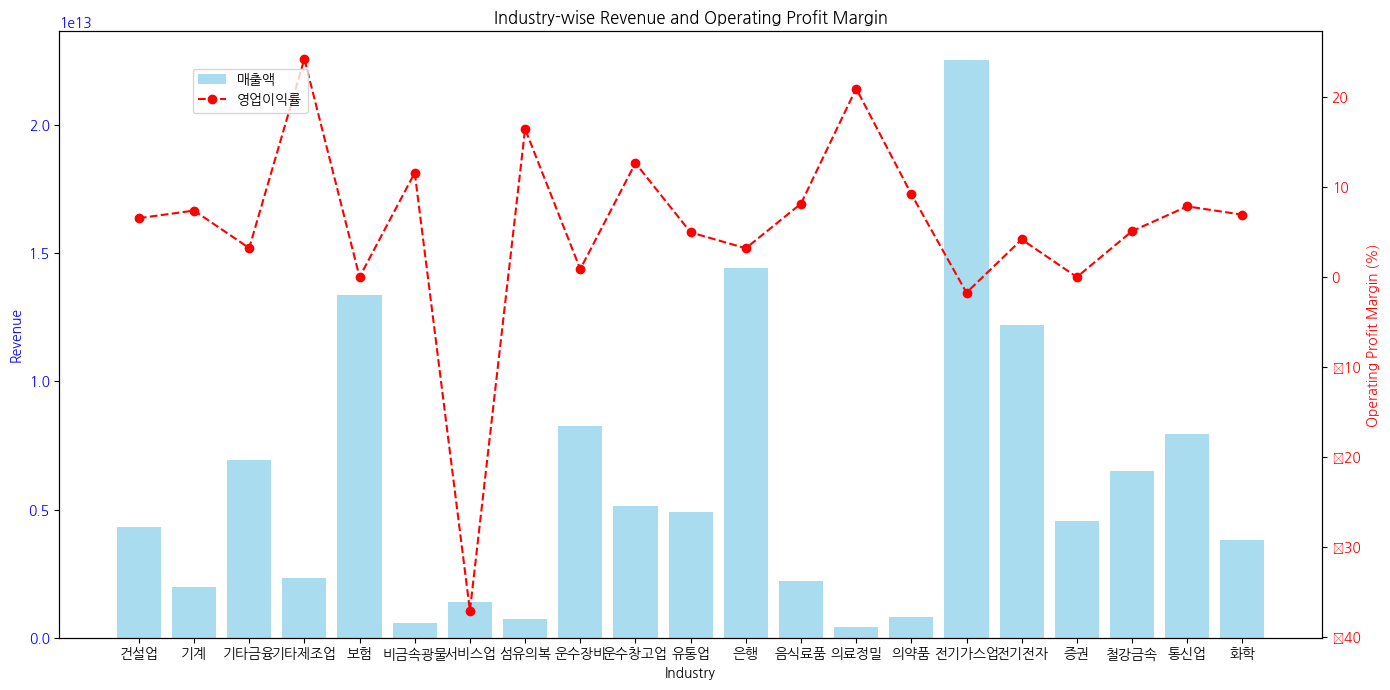

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# 시각화: 주축은 매출액, 보조축은 영업이익률
fig, ax1 = plt.subplots(figsize=(14, 7))  # 그래프 크기를 키움

# 주축: 매출액 (파란색 막대)
ax1.bar(industry_summary.index, industry_summary['매출액'], color='skyblue', alpha=0.7, label='매출액')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel("Industry")

# 보조축: 영업이익률 (빨간색 선)
ax2 = ax1.twinx()
ax2.plot(industry_summary.index, industry_summary['영업이익률'], color='red', marker='o', label='영업이익률', linestyle='dashed')
ax2.set_ylabel('Operating Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목과 레이블
plt.title("Industry-wise Revenue and Operating Profit Margin")
plt.xticks(rotation=45, fontsize=10, ha='right')  # 폰트 크기 및 정렬 조정

# 범례 추가
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


1. 분석

매출액이 높은 산업:

보험과 은행 산업의 매출액이 다른 산업에 비해 매우 높음.
이는 해당 산업이 금융 서비스 중심으로, 거래 규모 자체가 크기 때문.
전기/전자 산업 또한 매출액이 높게 나타남.

영업이익률이 높은 산업:

기타 금융업과 섬유/의복 산업에서 영업이익률이 매우 높음.
이는 소규모 운영 비용이나 높은 이익률을 유지하는 비즈니스 특성을 반영.
화학 산업도 높은 영업이익률을 보임.

매출액 대비 영업이익률이 낮은 산업:

보험과 은행 산업은 매출액은 높지만 영업이익률은 상대적으로 낮음.
이는 금융 산업 특성상 높은 비용 구조(운영 비용, 대출 이자율 등)를 반영.
건설업도 매출액은 중간 수준이지만 영업이익률이 낮음.

영업이익률이 낮은 산업:

비금속광물/서비스업 산업은 영업이익률이 음수(적자)로 나타남.
이는 해당 산업이 매출은 적고, 비용 구조가 불리하기 때문일 가능성이 있음.

2. 분석적 의미

* 산업별 특성:

고매출 저이익 산업:
보험, 은행: 거래 규모가 크지만, 영업비용이 높아 이익률이 낮음.

고이익 저매출 산업:
기타 금융업, 섬유/의복: 영업비용이 낮고, 수익성이 높은 산업.

저매출 저이익 산업:
비금속광물: 성장 가능성이 낮거나 비용이 높은 산업.

균형적 구조:
전기/전자, 화학: 높은 매출과 이익률로 안정적인 구조를 보임.

* 가중치 부여 가능성:

매출액 중심의 산업: 보험, 은행
매출액을 가중치로 활용해 산업별 기여도를 반영.

이익률 중심의 산업: 기타 금융업, 화학
영업이익률을 반영해 수익성 기반의 가중치를 부여


In [46]:
# 산업별로 주요 지표 상관관계 분석
industries = selected_data['industry'].unique()

for industry in industries:
    print(f"\n[Correlation Matrix for {industry}]")
    industry_data = selected_data[selected_data['industry'] == industry]
    correlation_matrix = industry_data.drop(columns=['industry']).corr()
    print(correlation_matrix)



[Correlation Matrix for 유통업]
              매출액      영업이익     영업이익률       ROE      부채총계      자산총계   매출액_증가율  \
매출액      1.000000  0.748361 -0.192700  0.221127  0.539716  0.548508  0.516174   
영업이익     0.748361  1.000000  0.187405  0.313709  0.421486  0.521027  0.397456   
영업이익률   -0.192700  0.187405  1.000000  0.272063 -0.258555 -0.154832 -0.020170   
ROE      0.221127  0.313709  0.272063  1.000000 -0.199268 -0.159784  0.355766   
부채총계     0.539716  0.421486 -0.258555 -0.199268  1.000000  0.959604 -0.004316   
자산총계     0.548508  0.521027 -0.154832 -0.159784  0.959604  1.000000  0.001455   
매출액_증가율  0.516174  0.397456 -0.020170  0.355766 -0.004316  0.001455  1.000000   
자산_부채비율  0.113333 -0.092233 -0.559309 -0.099458  0.150483 -0.003080 -0.015133   

          자산_부채비율  
매출액      0.113333  
영업이익    -0.092233  
영업이익률   -0.559309  
ROE     -0.099458  
부채총계     0.150483  
자산총계    -0.003080  
매출액_증가율 -0.015133  
자산_부채비율  1.000000  

[Correlation Matrix for 기타금융]
              매출액      영업이익  

In [42]:
import pandas as pd

# 데이터 로드
stock_data = pd.read_csv('kospi_200_stock_data.csv')  # 주가 데이터
financial_data = pd.read_csv('filtered_financial_pivot.csv')  # 재무제표 데이터
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목명, 시가총액, 산업 정보 포함

# 데이터 병합 (종목 코드와 날짜 기준)
merged_data = pd.merge(stock_data, financial_data, on=['stock_code', '날짜'], how='left')
merged_data = pd.merge(merged_data, kospi_200[['stock_code', 'industry']], on='stock_code', how='left')

# 날짜 오름차순으로 정렬
merged_data = merged_data.sort_values(by=['stock_code', '날짜'])

# 결측값을 forward fill로 채움
merged_data.fillna(method='ffill', inplace=True)

# 주요 컬럼 확인
print(merged_data.columns)

<ipython-input-42-dc092f7ee3dd>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '등락률', 'stock_code', 'corp_name',
       'corp_name_x', '금융부채', '금융상품관련순손익', '기타포괄손익-공정가치측정금융자산',
       '당기손익-공정가치측정금융자산', '당기순이익', '당기순이익(손실)', '매출액', '법인세차감전 순이익', '보험계약부채',
       '보험계약자산', '부채총계', '비유동부채', '비유동자산', '상각후원가측정금융자산', '순수수료손익', '순이자손익',
       '영업비용', '영업이익', '영업이익(손실)', '예수부채', '유동부채', '유동자산', '이익잉여금', '이자비용',
       '이자수익', '자본금', '자본총계', '자산총계', '차입부채', '총포괄손익', '파생상품관련손익', '파생상품부채',
       '파생상품자산', '매출액_증가율', '영업이익률', '자산_부채비율', 'ROE', 'industry'],
      dtype='object')


In [ ]:

# 엑셀로 저장
output_file = 'merged_kospi_200_full_data.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"엑셀 파일로 저장 완료: {output_file}")


[Correlation Matrix for 음식료품]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.370058  0.017365  0.251279  0.250507 -0.074185  0.017990   
거래량     -0.370058  1.000000  0.092891 -0.086400 -0.056975  0.137708  0.019128   
등락률      0.017365  0.092891  1.000000  0.013843  0.009630  0.011306  0.028772   
매출액      0.251279 -0.086400  0.013843  1.000000  0.866190 -0.223336  0.064430   
영업이익     0.250507 -0.056975  0.009630  0.866190  1.000000  0.008225  0.236714   
영업이익률   -0.074185  0.137708  0.011306 -0.223336  0.008225  1.000000  0.531191   
ROE      0.017990  0.019128  0.028772  0.064430  0.236714  0.531191  1.000000   
부채총계     0.248832 -0.059898  0.004760  0.748514  0.461957 -0.273966 -0.145272   
자산총계     0.278246 -0.079339  0.004437  0.751704  0.469651 -0.259958 -0.145145   
매출액_증가율 -0.024740 -0.029631  0.028759  0.338146  0.407990 -0.015524  0.543890   
자산_부채비율 -0.299420  0.246651  0.001068  0.197273  0.111054 -0.358079 -0.172722 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


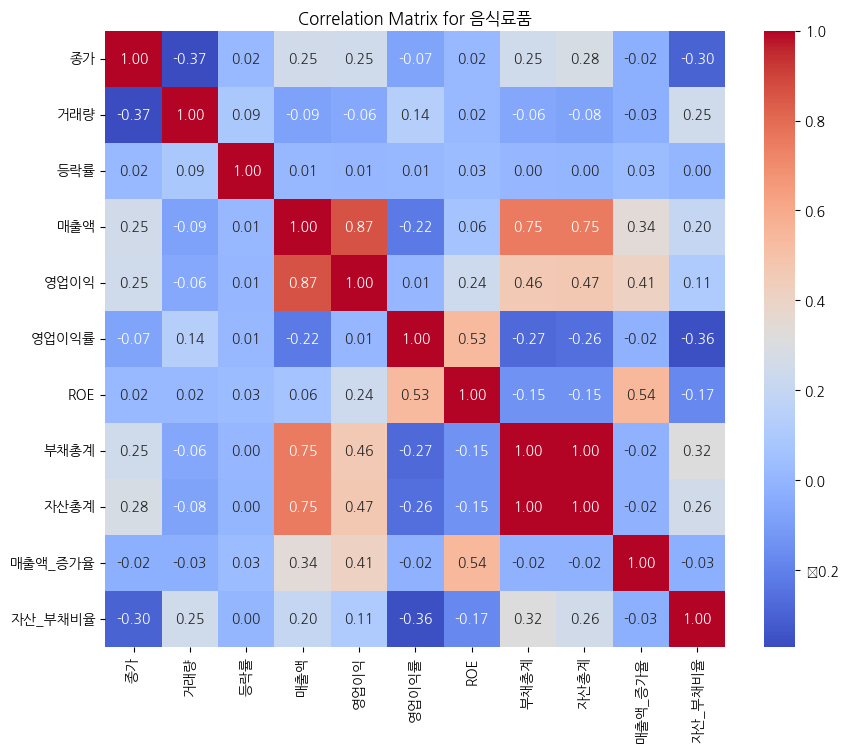


[Correlation Matrix for 의약품]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.083744  0.011029 -0.028412  0.506849  0.367292 -0.012204   
거래량     -0.083744  1.000000  0.254215 -0.006887 -0.028937  0.042342 -0.026790   
등락률      0.011029  0.254215  1.000000  0.003463 -0.006997 -0.000423 -0.018727   
매출액     -0.028412 -0.006887  0.003463  1.000000  0.421247 -0.009392  0.203071   
영업이익     0.506849 -0.028937 -0.006997  0.421247  1.000000  0.410267  0.387199   
영업이익률    0.367292  0.042342 -0.000423 -0.009392  0.410267  1.000000  0.281093   
ROE     -0.012204 -0.026790 -0.018727  0.203071  0.387199  0.281093  1.000000   
부채총계     0.596329 -0.062961  0.002286  0.486815  0.608982  0.226332 -0.029682   
자산총계     0.627036 -0.025169 -0.001606  0.347950  0.644225  0.266403 -0.035636   
매출액_증가율  0.011030 -0.046439 -0.013410  0.172030  0.296269  0.132225  0.411828   
자산_부채비율  0.165070 -0.122975  0.008171  0.264867  0.036722  0.065355  0.050717  

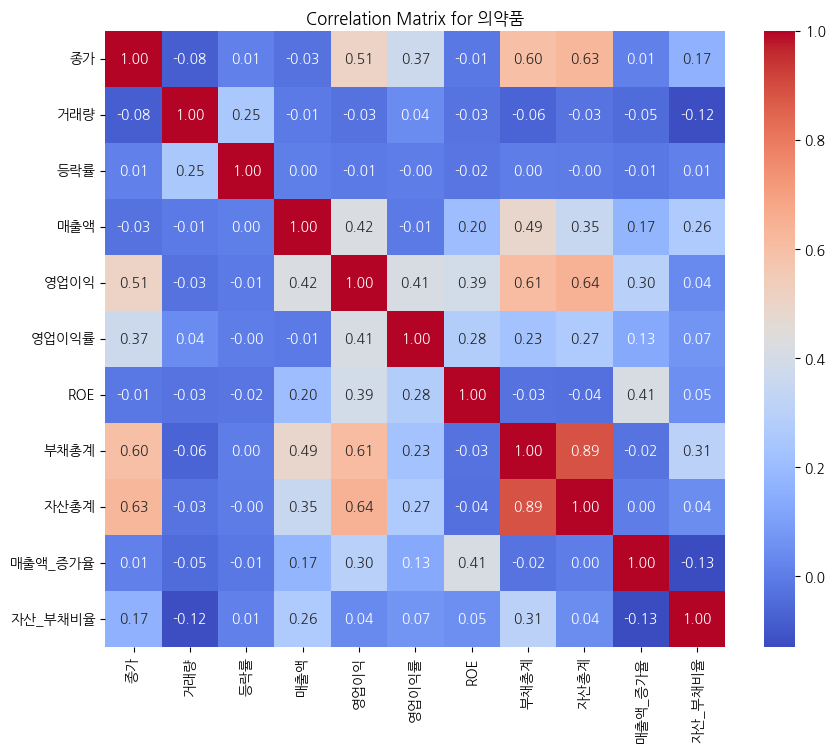


[Correlation Matrix for 운수창고업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.323728 -0.004377  0.187927 -0.148861 -0.342206 -0.078627   
거래량     -0.323728  1.000000  0.237541 -0.154349  0.035969  0.145256  0.033293   
등락률     -0.004377  0.237541  1.000000 -0.008976 -0.023800 -0.024772 -0.025634   
매출액      0.187927 -0.154349 -0.008976  1.000000  0.500344  0.083098  0.460396   
영업이익    -0.148861  0.035969 -0.023800  0.500344  1.000000  0.734630  0.835131   
영업이익률   -0.342206  0.145256 -0.024772  0.083098  0.734630  1.000000  0.676066   
ROE     -0.078627  0.033293 -0.025634  0.460396  0.835131  0.676066  1.000000   
부채총계    -0.237840 -0.067940  0.004623  0.160052  0.077534  0.022663 -0.131637   
자산총계    -0.317597 -0.085632 -0.011880  0.246763  0.225868  0.177981  0.012431   
매출액_증가율 -0.001995  0.050243  0.005642  0.684993  0.463613  0.106749  0.423399   
자산_부채비율  0.101811  0.020177  0.036935 -0.013321 -0.165247 -0.187778 -0.253152

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


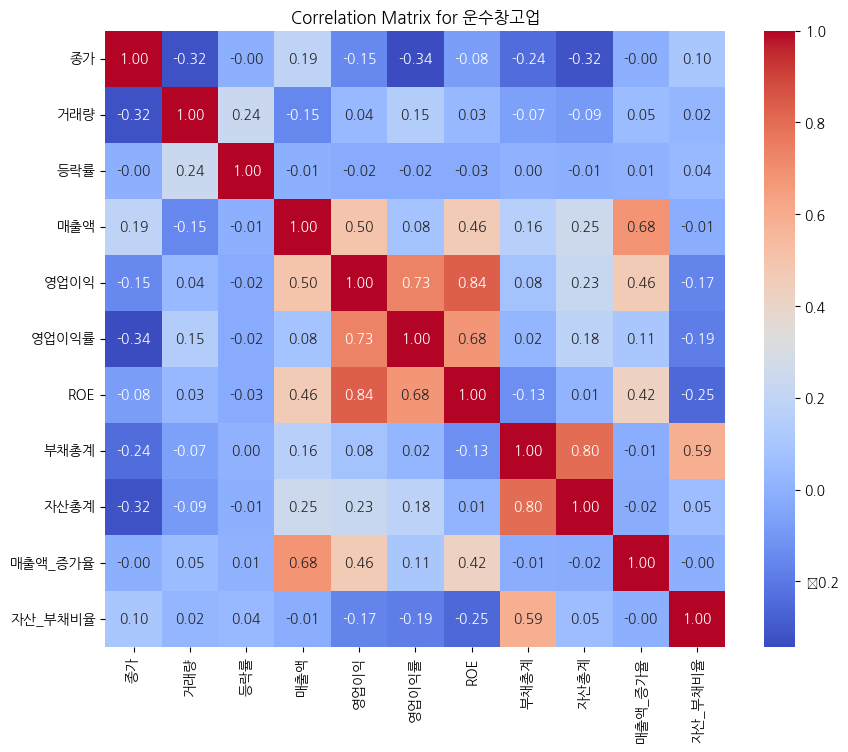


[Correlation Matrix for 기타금융]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.176544  0.019458  0.428731  0.303430  0.023307 -0.030355   
거래량     -0.176544  1.000000  0.084609 -0.068684 -0.052714 -0.049274  0.015867   
등락률      0.019458  0.084609  1.000000 -0.000359 -0.000531 -0.010115 -0.000083   
매출액      0.428731 -0.068684 -0.000359  1.000000  0.597497  0.023765  0.083500   
영업이익     0.303430 -0.052714 -0.000531  0.597497  1.000000  0.098925  0.185597   
영업이익률    0.023307 -0.049274 -0.010115  0.023765  0.098925  1.000000  0.092053   
ROE     -0.030355  0.015867 -0.000083  0.083500  0.185597  0.092053  1.000000   
부채총계     0.016397  0.181921  0.006263  0.120308  0.313354  0.001606  0.051452   
자산총계     0.080615  0.164896  0.005691  0.189829  0.362161  0.000009  0.044126   
매출액_증가율  0.028688  0.021473  0.006697  0.186435  0.062657 -0.034909  0.067156   
자산_부채비율  0.064313  0.045087  0.000969  0.263637  0.127731  0.056586  0.015501 

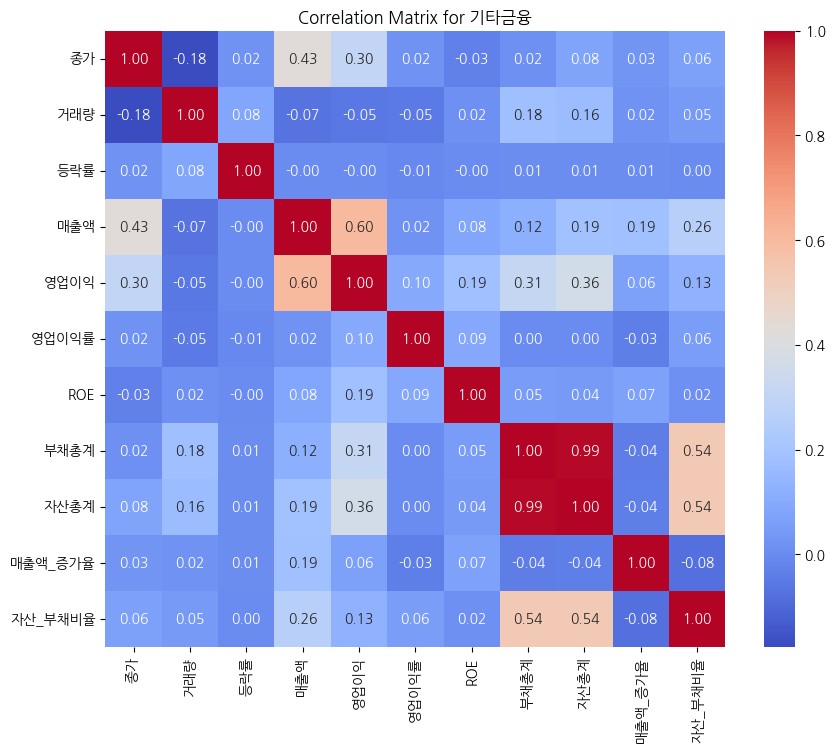


[Correlation Matrix for 화학]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.104097  0.002737  0.100520  0.167570  0.182049  0.224808   
거래량     -0.104097  1.000000  0.213703  0.000435 -0.013400 -0.059147 -0.035796   
등락률      0.002737  0.213703  1.000000 -0.001245 -0.006891 -0.014817  0.001137   
매출액      0.100520  0.000435 -0.001245  1.000000  0.745333 -0.075531  0.124341   
영업이익     0.167570 -0.013400 -0.006891  0.745333  1.000000  0.144868  0.314431   
영업이익률    0.182049 -0.059147 -0.014817 -0.075531  0.144868  1.000000  0.485397   
ROE      0.224808 -0.035796  0.001137  0.124341  0.314431  0.485397  1.000000   
부채총계    -0.047404  0.010900 -0.001179  0.578506  0.444020 -0.087025  0.006450   
자산총계    -0.002605  0.008984 -0.002329  0.636087  0.499544 -0.088331 -0.001219   
매출액_증가율  0.028598 -0.016444  0.009787  0.291178  0.198297  0.017493  0.245159   
자산_부채비율 -0.068816  0.089499  0.011016  0.265184  0.178283 -0.240848 -0.049221   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


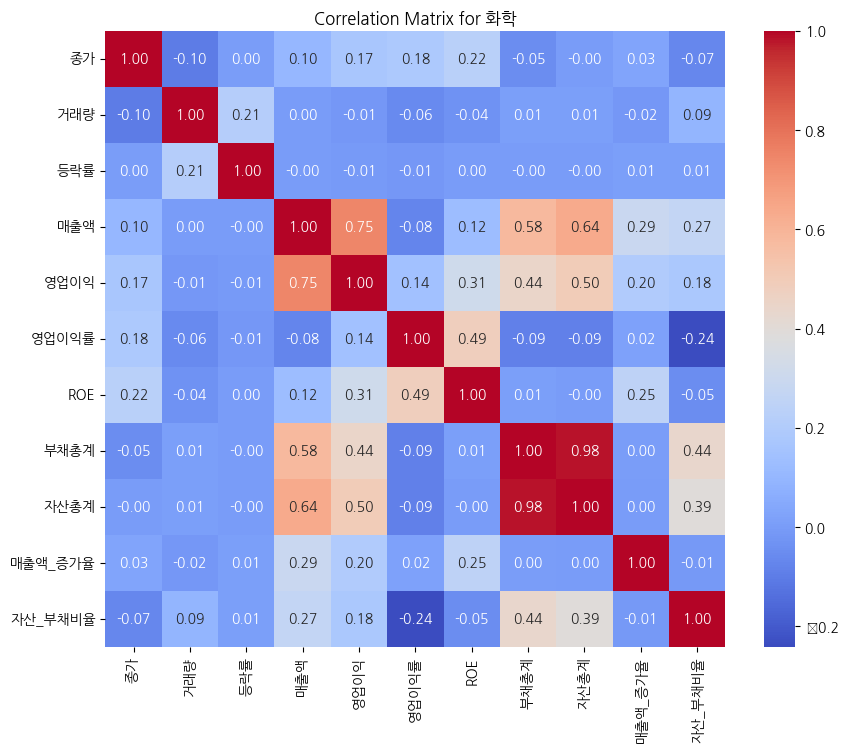


[Correlation Matrix for 운수장비]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.119287  0.017564  0.504797  0.405691  0.172756  0.090601   
거래량     -0.119287  1.000000  0.159660 -0.002725 -0.035811 -0.066962 -0.058099   
등락률      0.017564  0.159660  1.000000 -0.000438 -0.006089 -0.003392 -0.004121   
매출액      0.504797 -0.002725 -0.000438  1.000000  0.845080  0.145688  0.084702   
영업이익     0.405691 -0.035811 -0.006089  0.845080  1.000000  0.327899  0.251014   
영업이익률    0.172756 -0.066962 -0.003392  0.145688  0.327899  1.000000  0.550311   
ROE      0.090601 -0.058099 -0.004121  0.084702  0.251014  0.550311  1.000000   
부채총계     0.292873  0.014995  0.003149  0.405873  0.345048  0.058772  0.022155   
자산총계     0.420089  0.008586  0.002379  0.540278  0.465391  0.101959  0.039112   
매출액_증가율 -0.007219  0.018004  0.006163  0.194043  0.052281 -0.039045 -0.118872   
자산_부채비율 -0.177039  0.117853  0.020288 -0.095476 -0.144916 -0.281366 -0.189942 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


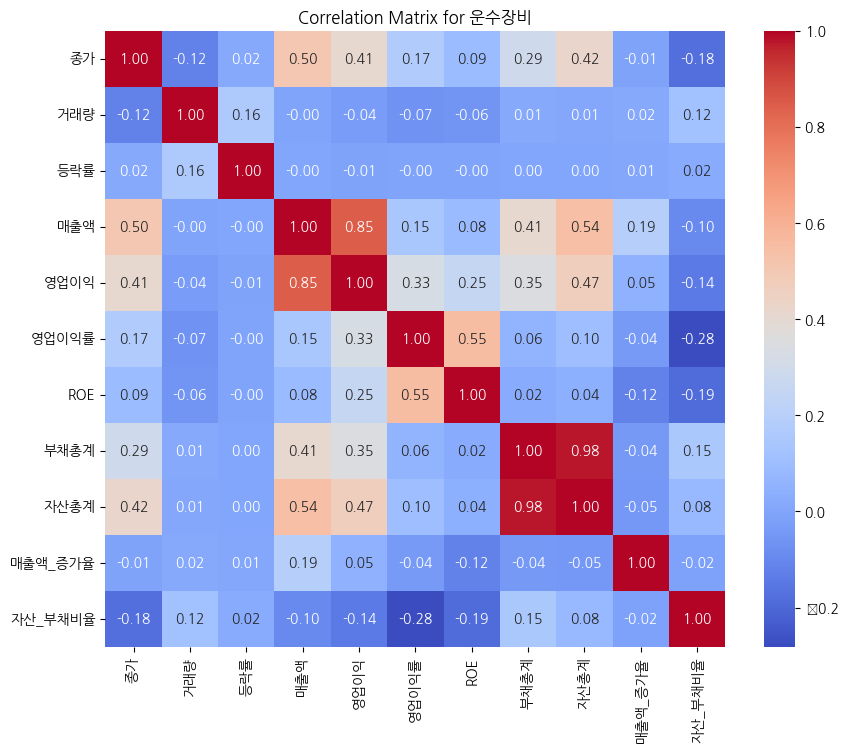


[Correlation Matrix for 전기전자]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.146251  0.005292 -0.040071 -0.044956  0.093677  0.190451   
거래량     -0.146251  1.000000  0.070931  0.549987  0.499041  0.100976  0.042575   
등락률      0.005292  0.070931  1.000000 -0.008593 -0.008550  0.020635  0.005425   
매출액     -0.040071  0.549987 -0.008593  1.000000  0.876661  0.094350  0.197243   
영업이익    -0.044956  0.499041 -0.008550  0.876661  1.000000  0.183751  0.276265   
영업이익률    0.093677  0.100976  0.020635  0.094350  0.183751  1.000000  0.316675   
ROE      0.190451  0.042575  0.005425  0.197243  0.276265  0.316675  1.000000   
부채총계    -0.042755  0.687503 -0.011451  0.743719  0.660362  0.084278  0.026039   
자산총계    -0.059653  0.743518 -0.009499  0.764096  0.676100  0.111173  0.066022   
매출액_증가율 -0.015296 -0.002145  0.005861  0.205959  0.140666  0.024783  0.237884   
자산_부채비율 -0.097915 -0.279472  0.023702 -0.241393 -0.273232 -0.224777 -0.146997 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


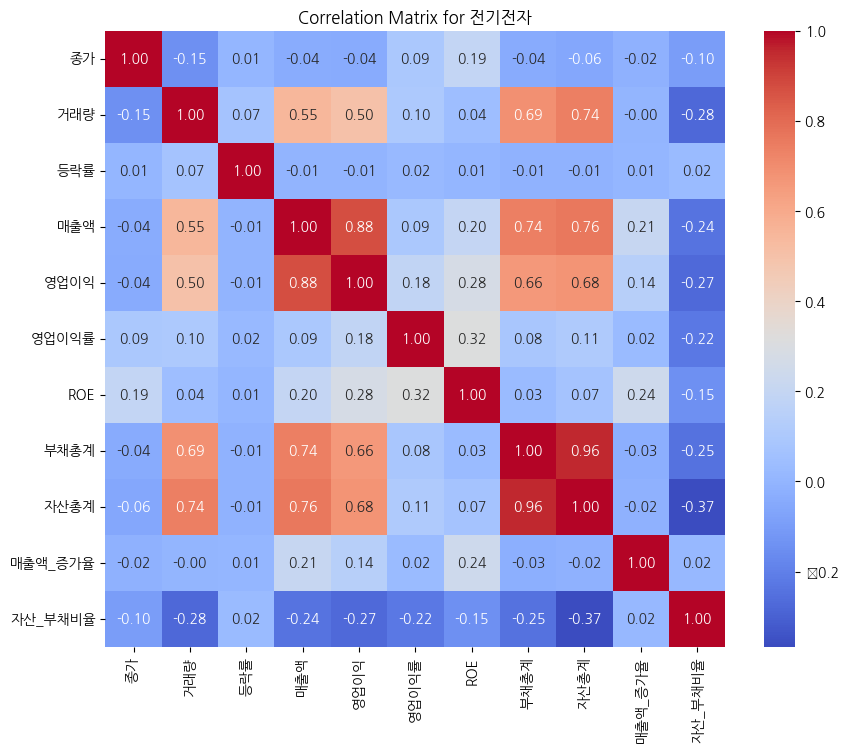


[Correlation Matrix for 철강금속]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.149755  0.000809  0.257160  0.218318  0.085278 -0.022205   
거래량     -0.149755  1.000000  0.236672  0.052639 -0.001327 -0.018606  0.148251   
등락률      0.000809  0.236672  1.000000 -0.001524 -0.008078 -0.016041 -0.003185   
매출액      0.257160  0.052639 -0.001524  1.000000  0.682697 -0.007637  0.126821   
영업이익     0.218318 -0.001327 -0.008078  0.682697  1.000000  0.395039  0.306113   
영업이익률    0.085278 -0.018606 -0.016041 -0.007637  0.395039  1.000000  0.417503   
ROE     -0.022205  0.148251 -0.003185  0.126821  0.306113  0.417503  1.000000   
부채총계     0.138806  0.004411 -0.007842  0.670341  0.589422  0.058477  0.033299   
자산총계     0.243317  0.004627 -0.009857  0.757738  0.663967  0.110047  0.039302   
매출액_증가율  0.009598  0.085584  0.034585  0.073626  0.044987 -0.015245  0.413981   
자산_부채비율 -0.726665  0.170964  0.017571 -0.067461 -0.063349 -0.102767  0.035686 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


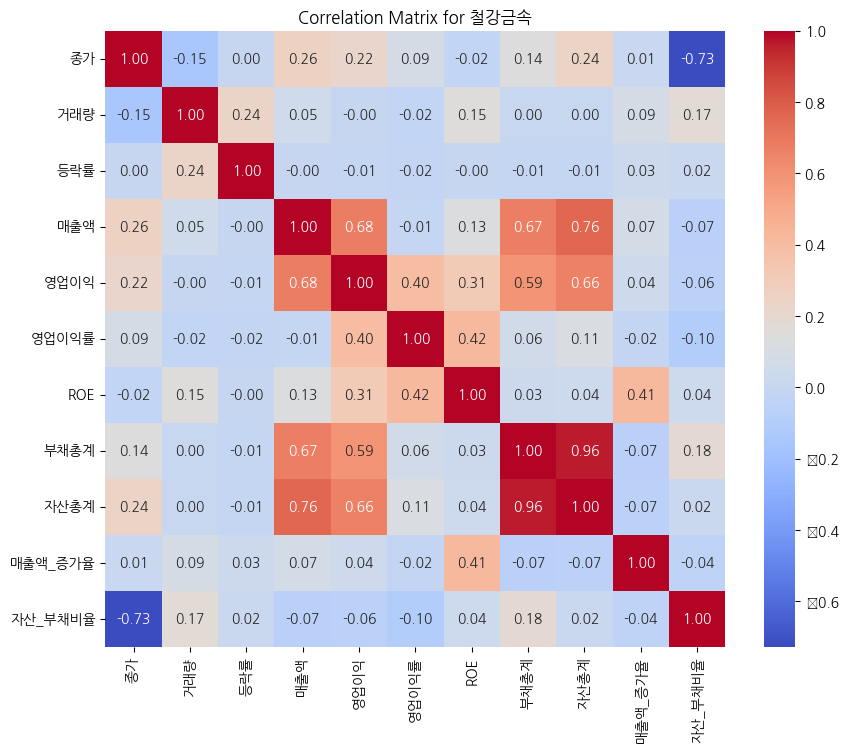


[Correlation Matrix for 건설업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.302748  0.017022  0.062878  0.136293  0.012450  0.025805   
거래량     -0.302748  1.000000  0.148243  0.011677  0.067603  0.006076  0.056763   
등락률      0.017022  0.148243  1.000000  0.005802 -0.003064 -0.008195 -0.003023   
매출액      0.062878  0.011677  0.005802  1.000000  0.687667 -0.310561  0.267401   
영업이익     0.136293  0.067603 -0.003064  0.687667  1.000000  0.042395  0.746901   
영업이익률    0.012450  0.006076 -0.008195 -0.310561  0.042395  1.000000  0.146961   
ROE      0.025805  0.056763 -0.003023  0.267401  0.746901  0.146961  1.000000   
부채총계    -0.019900  0.079192  0.003934  0.515079  0.291760 -0.480709 -0.119568   
자산총계     0.139840  0.028243  0.003689  0.534829  0.318400 -0.454057 -0.130208   
매출액_증가율  0.022940 -0.000578  0.004947  0.588230  0.620160  0.032274  0.602889   
자산_부채비율 -0.392041  0.241177  0.001578  0.298061  0.238801 -0.444911  0.025751  

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


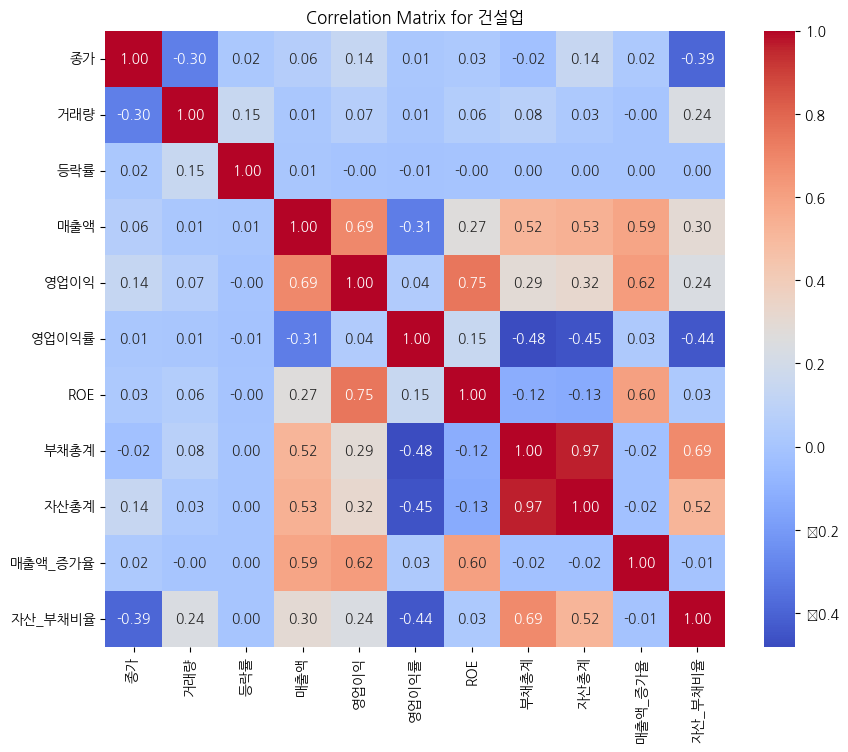


[Correlation Matrix for 보험]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.211199  0.012455 -0.002950  0.048188 -0.098890  0.037650   
거래량     -0.211199  1.000000  0.210972 -0.136677 -0.075675 -0.206069  0.034897   
등락률      0.012455  0.210972  1.000000 -0.002135 -0.000962 -0.006292  0.007243   
매출액     -0.002950 -0.136677 -0.002135  1.000000  0.813610 -0.060968  0.217841   
영업이익     0.048188 -0.075675 -0.000962  0.813610  1.000000 -0.207560  0.503088   
영업이익률   -0.098890 -0.206069 -0.006292 -0.060968 -0.207560  1.000000 -0.367739   
ROE      0.037650  0.034897  0.007243  0.217841  0.503088 -0.367739  1.000000   
부채총계    -0.415549  0.412970  0.005655 -0.295835 -0.140766 -0.569312  0.089848   
자산총계    -0.420066  0.407405  0.006571 -0.259642 -0.131452 -0.558293  0.063610   
매출액_증가율  0.292326  0.037164  0.006746  0.478855  0.256688 -0.269910 -0.000514   
자산_부채비율 -0.087101  0.297580  0.003227 -0.062624  0.217277 -0.653523  0.463005   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


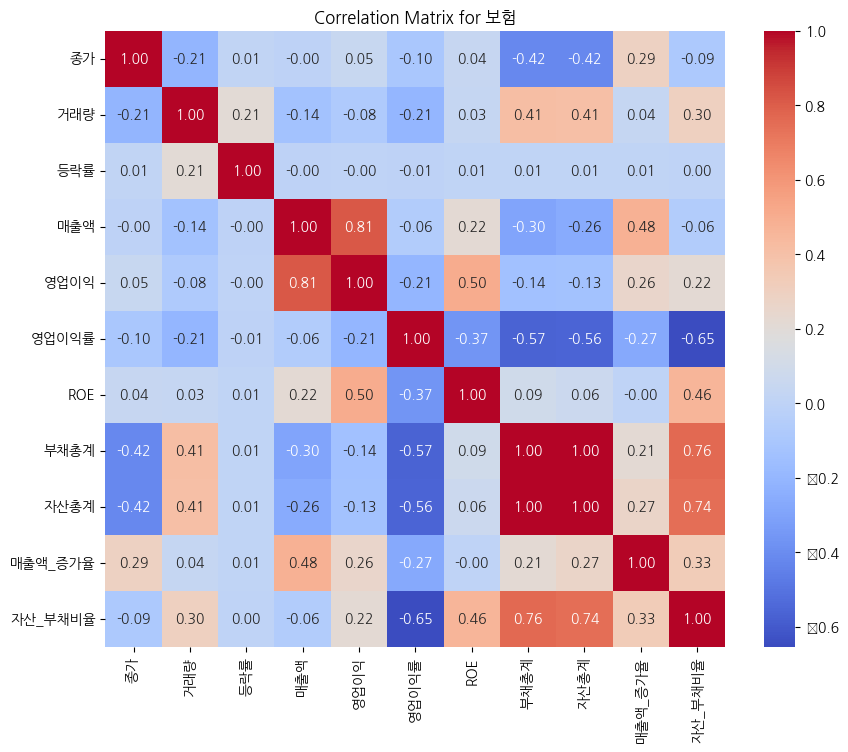


[Correlation Matrix for 유통업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.156852  0.005193  0.060961  0.039216 -0.063557  0.015161   
거래량     -0.156852  1.000000  0.194821  0.110513  0.023342 -0.098463 -0.018048   
등락률      0.005193  0.194821  1.000000  0.005050  0.002368 -0.004042 -0.000007   
매출액      0.060961  0.110513  0.005050  1.000000  0.701791 -0.214761  0.213423   
영업이익     0.039216  0.023342  0.002368  0.701791  1.000000  0.080246  0.197024   
영업이익률   -0.063557 -0.098463 -0.004042 -0.214761  0.080246  1.000000  0.244771   
ROE      0.015161 -0.018048 -0.000007  0.213423  0.197024  0.244771  1.000000   
부채총계    -0.006698 -0.015073 -0.000583  0.376519  0.718010 -0.154237 -0.077839   
자산총계     0.056997 -0.016024 -0.000562  0.458206  0.762534 -0.154073 -0.098475   
매출액_증가율  0.051431 -0.034191  0.004625  0.479652  0.255667 -0.029274  0.418511   
자산_부채비율  0.085119  0.140563 -0.005934  0.162053  0.053295 -0.552028 -0.062681  

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


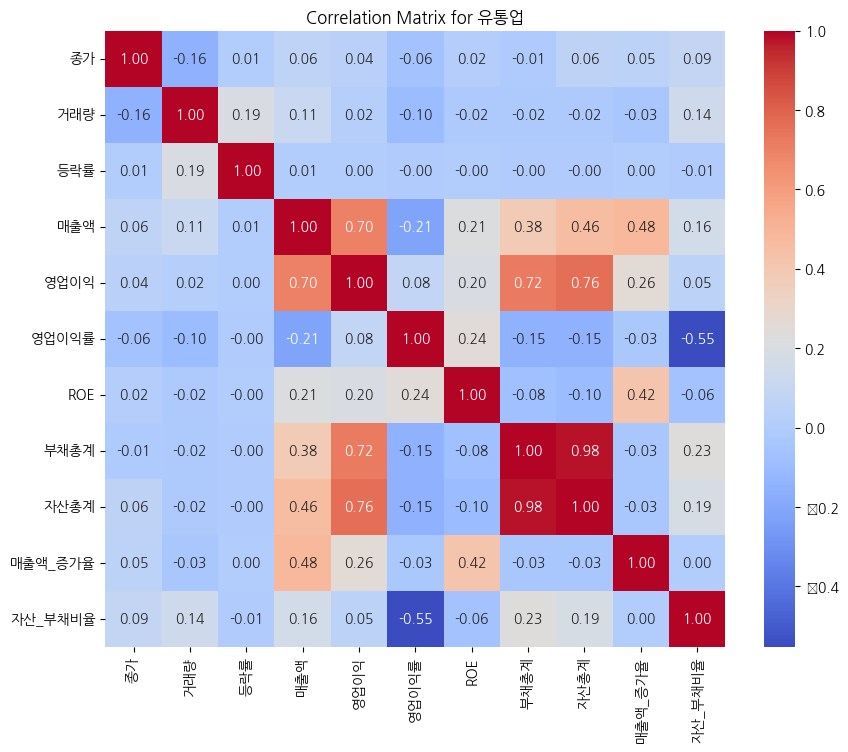


[Correlation Matrix for 서비스업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.066464  0.005723  0.036705  0.314318  0.057163  0.120939   
거래량     -0.066464  1.000000  0.182764 -0.010831  0.002284  0.015386  0.023713   
등락률      0.005723  0.182764  1.000000 -0.008618 -0.005380  0.005178  0.007562   
매출액      0.036705 -0.010831 -0.008618  1.000000  0.640004  0.098729  0.122474   
영업이익     0.314318  0.002284 -0.005380  0.640004  1.000000  0.183122  0.274609   
영업이익률    0.057163  0.015386  0.005178  0.098729  0.183122  1.000000  0.155875   
ROE      0.120939  0.023713  0.007562  0.122474  0.274609  0.155875  1.000000   
부채총계     0.060647  0.019070 -0.004222  0.737584  0.397293  0.055965  0.037836   
자산총계     0.104917  0.021116 -0.007300  0.743639  0.478119  0.078354  0.071075   
매출액_증가율 -0.030275  0.068288  0.010642  0.131690  0.170058 -0.025064 -0.105462   
자산_부채비율 -0.226898  0.055380  0.006415 -0.023180 -0.085590 -0.096064 -0.356994 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


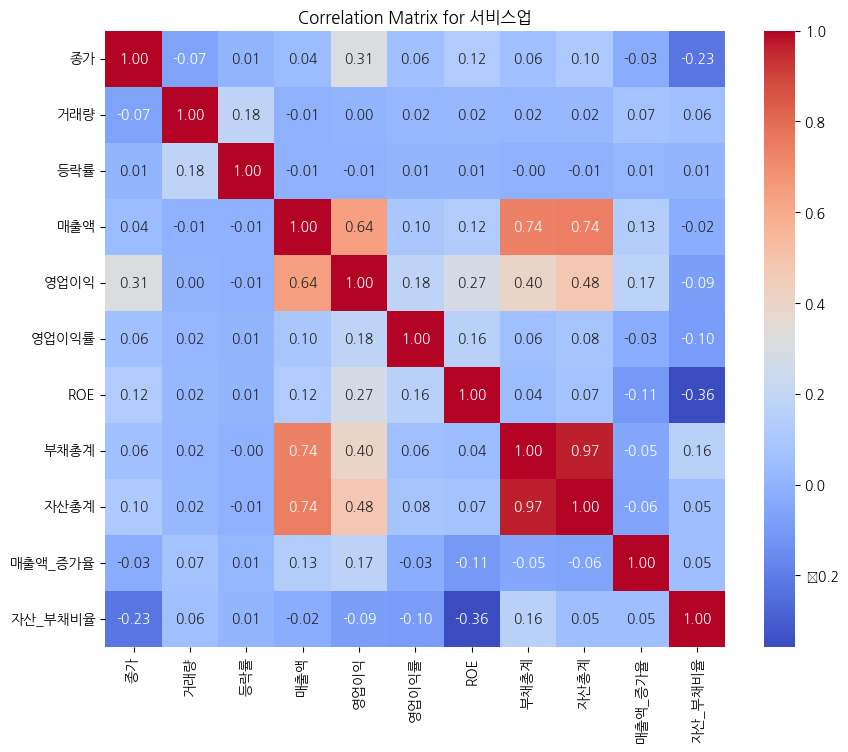


[Correlation Matrix for 증권]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.424377  0.019993 -0.402238 -0.378140  0.037496  0.783585   
거래량     -0.424377  1.000000  0.074802  0.043887  0.066062 -0.179641 -0.373095   
등락률      0.019993  0.074802  1.000000 -0.011875 -0.010821 -0.011456  0.004251   
매출액     -0.402238  0.043887 -0.011875  1.000000  0.985908  0.826915 -0.214626   
영업이익    -0.378140  0.066062 -0.010821  0.985908  1.000000  0.819933 -0.142846   
영업이익률    0.037496 -0.179641 -0.011456  0.826915  0.819933  1.000000  0.253866   
ROE      0.783585 -0.373095  0.004251 -0.214626 -0.142846  0.253866  1.000000   
부채총계    -0.261704 -0.155458 -0.005137  0.429723  0.284382  0.322179 -0.477988   
자산총계    -0.418265 -0.004500 -0.010873  0.970605  0.923663  0.790385 -0.310491   
매출액_증가율  0.127067 -0.011332 -0.001236 -0.065863 -0.078948 -0.072955  0.238455   
자산_부채비율  0.587315 -0.460708  0.012780 -0.541286 -0.604452 -0.271273  0.371683   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


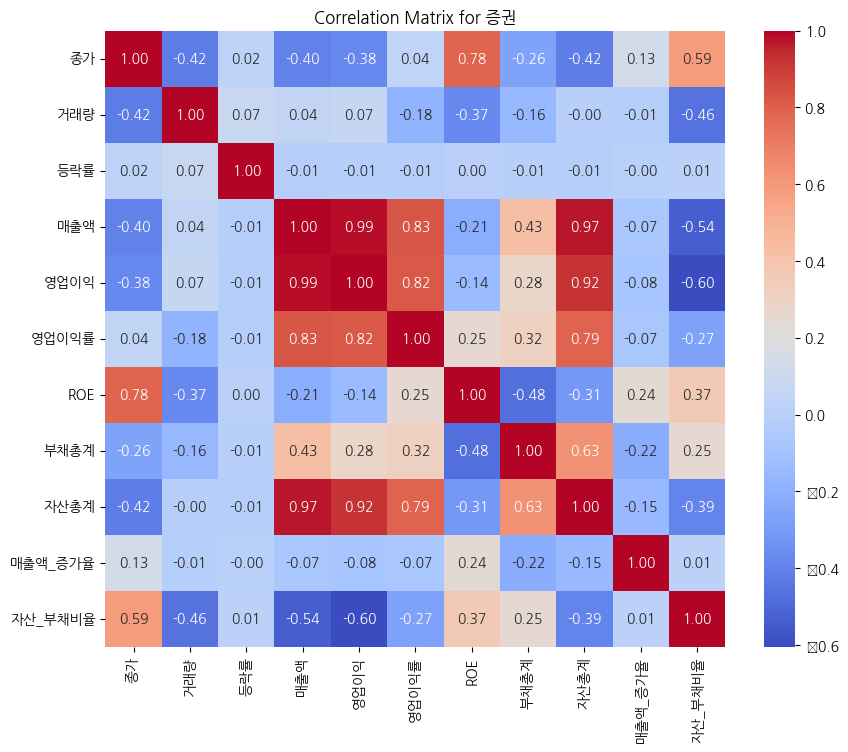


[Correlation Matrix for 전기가스업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.070493  0.054814 -0.341285  0.278567  0.361568  0.322218   
거래량     -0.070493  1.000000  0.209524  0.031198  0.045437  0.091565  0.031704   
등락률      0.054814  0.209524  1.000000 -0.005799  0.008658  0.013416  0.006038   
매출액     -0.341285  0.031198 -0.005799  1.000000 -0.565622 -0.359839 -0.547682   
영업이익     0.278567  0.045437  0.008658 -0.565622  1.000000  0.787907  0.948985   
영업이익률    0.361568  0.091565  0.013416 -0.359839  0.787907  1.000000  0.745096   
ROE      0.322218  0.031704  0.006038 -0.547682  0.948985  0.745096  1.000000   
부채총계    -0.666580  0.226313  0.002627  0.536648 -0.362055 -0.449309 -0.381964   
자산총계    -0.676796  0.272271  0.000454  0.502538 -0.333156 -0.426669 -0.352224   
매출액_증가율 -0.000236 -0.113606 -0.015132  0.653140 -0.260620 -0.094765 -0.244867   
자산_부채비율  0.165064 -0.201237  0.029468  0.273105 -0.095418 -0.156033 -0.117156

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


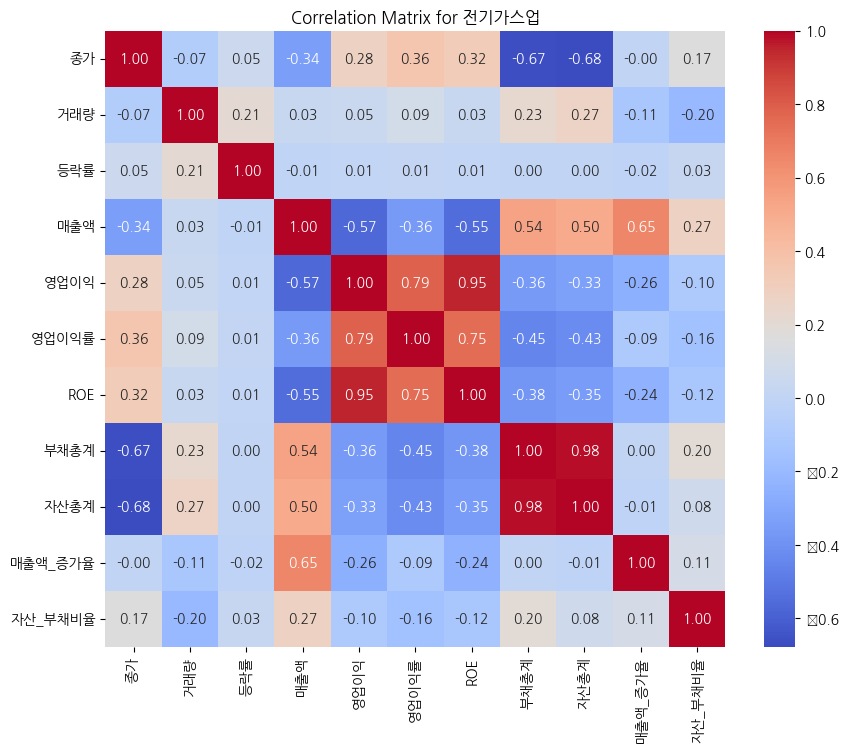


[Correlation Matrix for 통신업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.181473  0.029850  0.153192  0.285359  0.278079  0.170455   
거래량     -0.181473  1.000000  0.095765 -0.097635 -0.153266 -0.049475 -0.099519   
등락률      0.029850  0.095765  1.000000  0.037145  0.030616 -0.017398  0.009727   
매출액      0.153192 -0.097635  0.037145  1.000000  0.949687 -0.287050  0.639967   
영업이익     0.285359 -0.153266  0.030616  0.949687  1.000000 -0.090497  0.707653   
영업이익률    0.278079 -0.049475 -0.017398 -0.287050 -0.090497  1.000000 -0.289607   
ROE      0.170455 -0.099519  0.009727  0.639967  0.707653 -0.289607  1.000000   
부채총계     0.639651 -0.161948  0.032386  0.354126  0.357112 -0.276604  0.137859   
자산총계     0.648033 -0.108668  0.034530  0.309531  0.301310 -0.288054  0.100096   
매출액_증가율 -0.024383  0.023755  0.037104  0.850548  0.832315 -0.141308  0.656372   
자산_부채비율 -0.344865 -0.003250 -0.009553 -0.046765 -0.007363  0.520433 -0.255487  

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


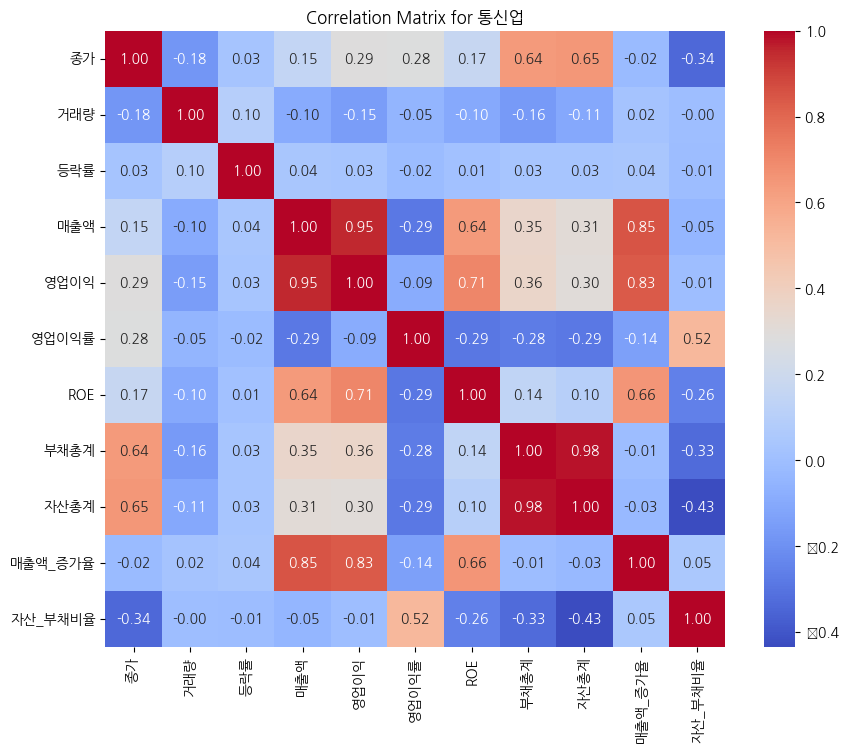


[Correlation Matrix for 기계]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.167378  0.025264 -0.278788 -0.189881 -0.078120  0.131095   
거래량     -0.167378  1.000000  0.225034  0.222179  0.145430 -0.018630 -0.069160   
등락률      0.025264  0.225034  1.000000 -0.007678 -0.014232 -0.002451  0.017434   
매출액     -0.278788  0.222179 -0.007678  1.000000  0.809202 -0.067857 -0.097415   
영업이익    -0.189881  0.145430 -0.014232  0.809202  1.000000  0.123341  0.035167   
영업이익률   -0.078120 -0.018630 -0.002451 -0.067857  0.123341  1.000000  0.314979   
ROE      0.131095 -0.069160  0.017434 -0.097415  0.035167  0.314979  1.000000   
부채총계    -0.335479  0.356219  0.001467  0.641043  0.531366 -0.083566 -0.305508   
자산총계    -0.334150  0.320391 -0.004753  0.651745  0.644011 -0.027400 -0.287999   
매출액_증가율  0.025355 -0.015579  0.000071  0.384414  0.328188  0.011576  0.432224   
자산_부채비율 -0.111767  0.079479 -0.006610  0.268276  0.049615 -0.184858 -0.208786   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


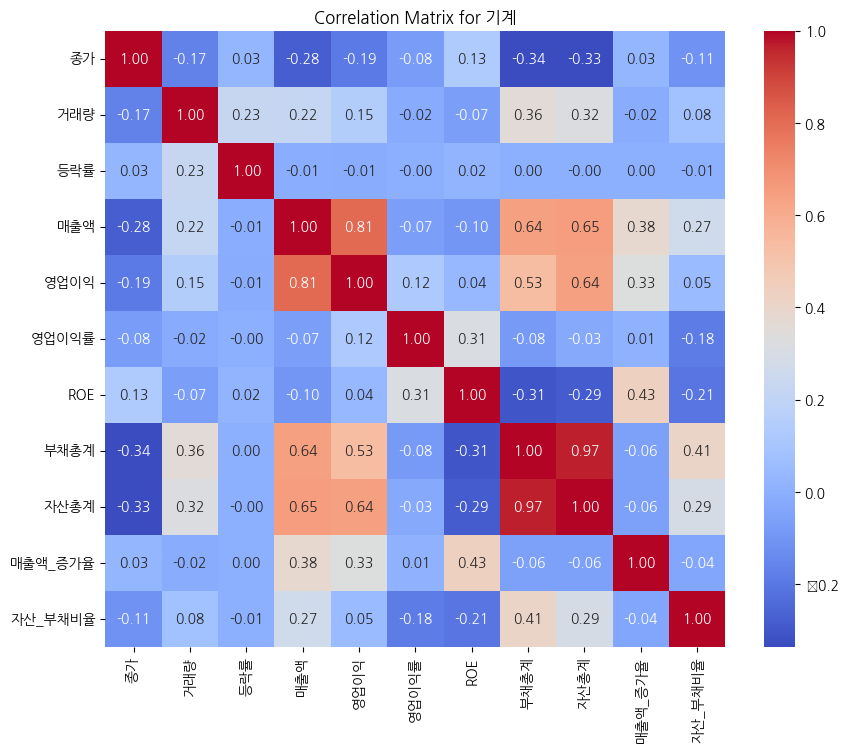


[Correlation Matrix for 은행]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000  0.184627 -0.011517 -0.244856 -0.068778 -0.049583  0.581561   
거래량      0.184627  1.000000  0.099096 -0.075967 -0.059487 -0.093900  0.031025   
등락률     -0.011517  0.099096  1.000000  0.010732  0.003193 -0.012379 -0.030342   
매출액     -0.244856 -0.075967  0.010732  1.000000  0.968044 -0.094164  0.023393   
영업이익    -0.068778 -0.059487  0.003193  0.968044  1.000000 -0.013199  0.262302   
영업이익률   -0.049583 -0.093900 -0.012379 -0.094164 -0.013199  1.000000  0.537757   
ROE      0.581561  0.031025 -0.030342  0.023393  0.262302  0.537757  1.000000   
부채총계     0.666007  0.132443 -0.027689  0.144803  0.316174 -0.317075  0.590432   
자산총계     0.663637  0.132953 -0.027627  0.145318  0.315111 -0.323121  0.583970   
매출액_증가율  0.070745 -0.077637 -0.015425 -0.070143  0.048388  0.984880  0.671615   
자산_부채비율  0.695891  0.079304 -0.026833  0.126042  0.363470  0.087303  0.883832   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


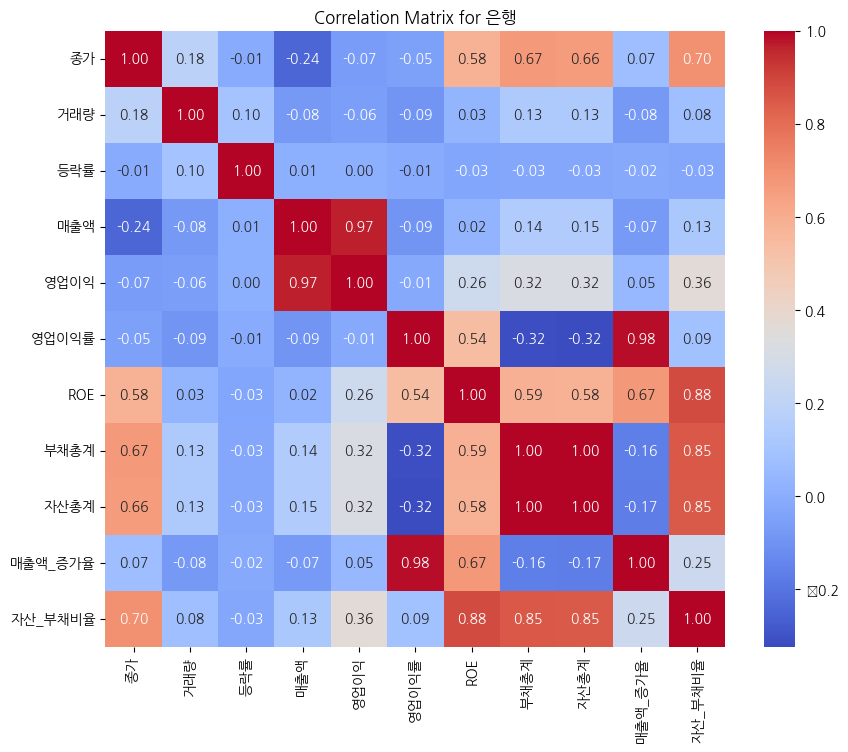


[Correlation Matrix for 기타제조업]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.121136  0.135739 -0.046193 -0.126959 -0.047533 -0.049274   
거래량     -0.121136  1.000000  0.043533 -0.102710 -0.009426 -0.029208 -0.067713   
등락률      0.135739  0.043533  1.000000 -0.020890 -0.027187  0.028566 -0.011037   
매출액     -0.046193 -0.102710 -0.020890  1.000000  0.967649  0.114000  0.962986   
영업이익    -0.126959 -0.009426 -0.027187  0.967649  1.000000  0.088658  0.965546   
영업이익률   -0.047533 -0.029208  0.028566  0.114000  0.088658  1.000000  0.244888   
ROE     -0.049274 -0.067713 -0.011037  0.962986  0.965546  0.244888  1.000000   
부채총계    -0.105341  0.200531 -0.046294 -0.160540 -0.045224 -0.901438 -0.244415   
자산총계    -0.103954  0.199837 -0.046320 -0.159722 -0.044563 -0.901939 -0.243549   
매출액_증가율 -0.014134 -0.027108 -0.020534  0.939129  0.948728  0.104651  0.921535   
자산_부채비율 -0.012609  0.164596 -0.040518 -0.181483 -0.087970 -0.928260 -0.277656

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


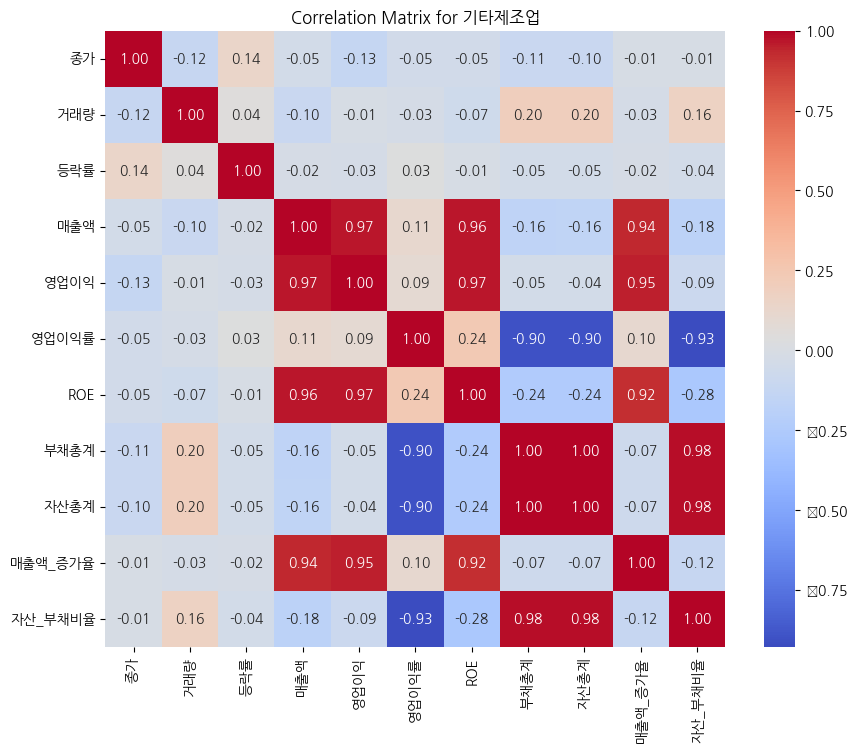


[Correlation Matrix for 섬유의복]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.166710  0.014820 -0.212996 -0.155909  0.772384  0.480050   
거래량     -0.166710  1.000000  0.265777  0.036472 -0.053246 -0.244024 -0.113468   
등락률      0.014820  0.265777  1.000000 -0.007265 -0.030081 -0.038366 -0.023497   
매출액     -0.212996  0.036472 -0.007265  1.000000  0.121115 -0.077291  0.525977   
영업이익    -0.155909 -0.053246 -0.030081  0.121115  1.000000 -0.238352 -0.073121   
영업이익률    0.772384 -0.244024 -0.038366 -0.077291 -0.238352  1.000000  0.613641   
ROE      0.480050 -0.113468 -0.023497  0.525977 -0.073121  0.613641  1.000000   
부채총계    -0.183969 -0.039703 -0.027510  0.070863  0.996523 -0.286640 -0.148498   
자산총계    -0.183394 -0.040073 -0.027522  0.070721  0.996576 -0.285985 -0.148335   
매출액_증가율  0.032114  0.019579  0.006038  0.843286 -0.012866  0.007076  0.579466   
자산_부채비율 -0.377153  0.207397  0.007520  0.034262  0.585249 -0.655875 -0.300985 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


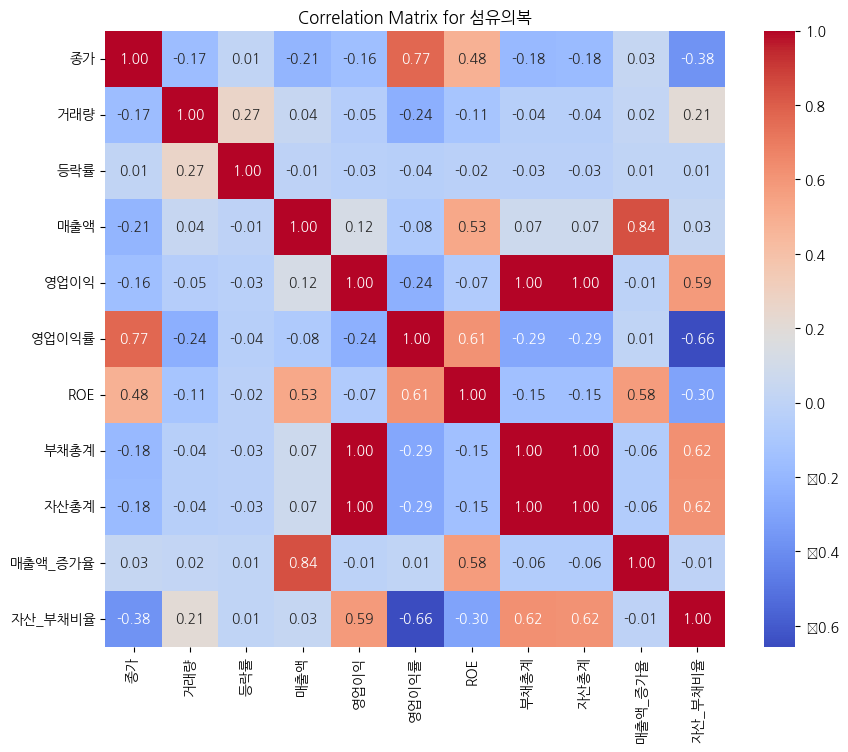


[Correlation Matrix for 의료정밀]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000 -0.150123  0.046938 -0.219093 -0.183615  0.405743  0.116926   
거래량     -0.150123  1.000000  0.157315  0.035709  0.195259  0.057762  0.120260   
등락률      0.046938  0.157315  1.000000 -0.029327 -0.040880 -0.006427 -0.030774   
매출액     -0.219093  0.035709 -0.029327  1.000000  0.293226 -0.044765  0.162938   
영업이익    -0.183615  0.195259 -0.040880  0.293226  1.000000  0.521446  0.884752   
영업이익률    0.405743  0.057762 -0.006427 -0.044765  0.521446  1.000000  0.676895   
ROE      0.116926  0.120260 -0.030774  0.162938  0.884752  0.676895  1.000000   
부채총계    -0.143152 -0.046848 -0.012854  0.909296 -0.115061 -0.227487 -0.187993   
자산총계    -0.248502 -0.010832 -0.019108  0.924501 -0.048423 -0.238723 -0.161521   
매출액_증가율 -0.000999  0.033925 -0.031997  0.216657  0.520334  0.100142  0.581019   
자산_부채비율  0.400739 -0.260639  0.041678  0.066921 -0.489258 -0.135210 -0.314362 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


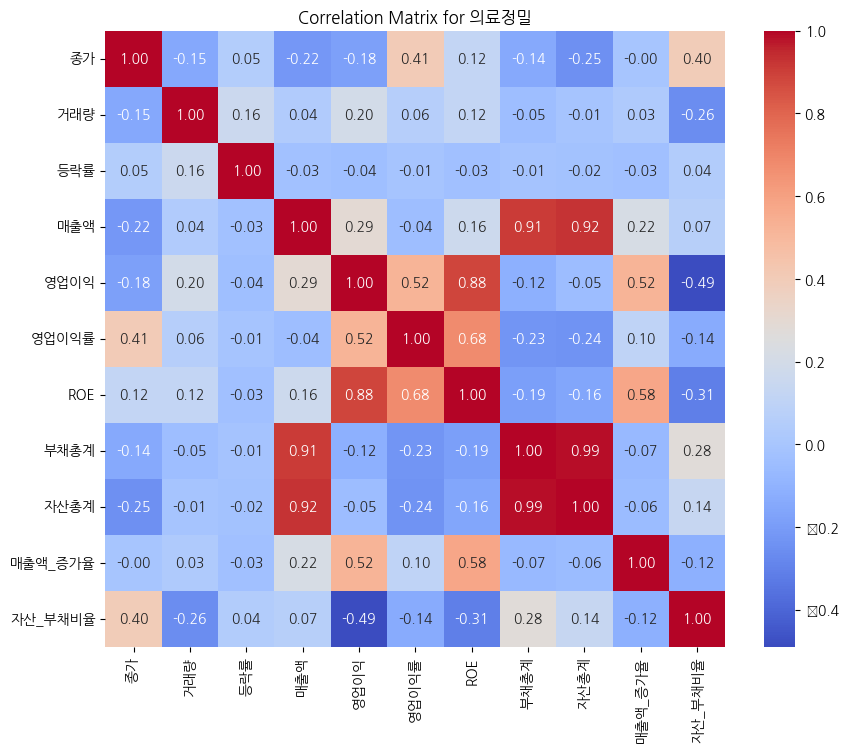


[Correlation Matrix for 비금속광물]
               종가       거래량       등락률       매출액      영업이익     영업이익률       ROE  \
종가       1.000000  0.355441  0.047789  0.020276  0.110382  0.105304  0.158676   
거래량      0.355441  1.000000  0.198316 -0.033437 -0.010198  0.045979  0.001161   
등락률      0.047789  0.198316  1.000000  0.015161  0.021516  0.010107  0.033464   
매출액      0.020276 -0.033437  0.015161  1.000000  0.834505  0.017894  0.733762   
영업이익     0.110382 -0.010198  0.021516  0.834505  1.000000  0.498848  0.950018   
영업이익률    0.105304  0.045979  0.010107  0.017894  0.498848  1.000000  0.551785   
ROE      0.158676  0.001161  0.033464  0.733762  0.950018  0.551785  1.000000   
부채총계    -0.235418 -0.049964 -0.009337  0.299968  0.104097 -0.089750 -0.132025   
자산총계     0.078043 -0.011978 -0.013269  0.365001  0.349756  0.182012  0.152898   
매출액_증가율  0.112192  0.006972  0.029271  0.850247  0.814583  0.200676  0.840829   
자산_부채비율 -0.336700 -0.057500 -0.002141  0.207674 -0.045123 -0.214425 -0.258209

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


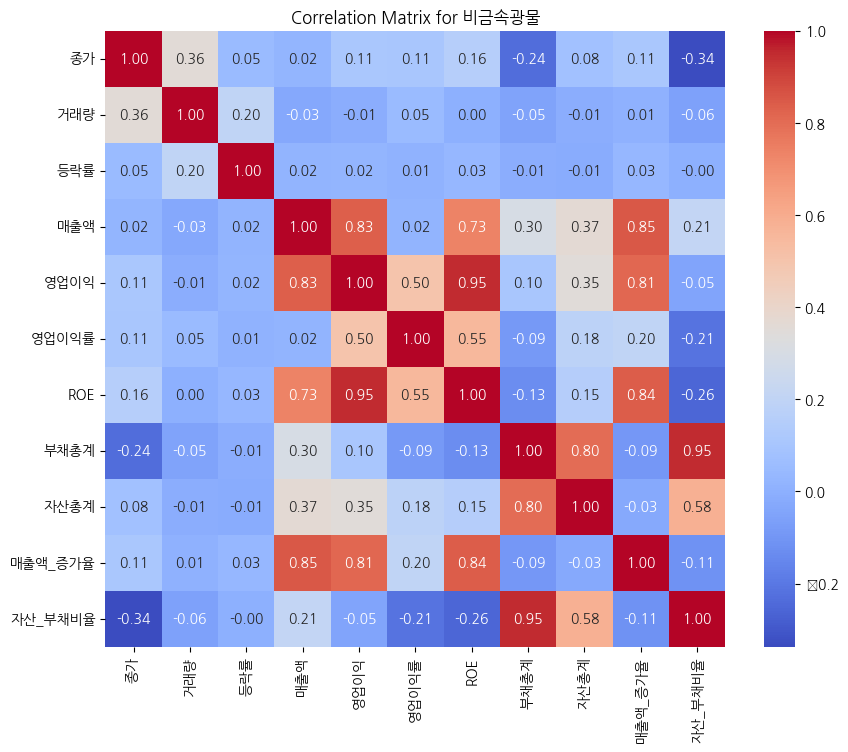

In [31]:
# 주요 변수 선택
correlation_features = ['종가', '거래량', '등락률', '매출액','영업이익', '영업이익률', 'ROE', '부채총계',
                        '자산총계','매출액_증가율','자산_부채비율']

# 상관 분석
industries = merged_data['industry'].unique()

for industry in industries:
    industry_data = merged_data[merged_data['industry'] == industry]
    print(f"\n[Correlation Matrix for {industry}]")
    correlation_matrix = industry_data[correlation_features].corr()
    print(correlation_matrix)

    # 시각화
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Correlation Matrix for {industry}")
    plt.show()


* 음식료품

종가와 매출액/영업이익(0.25) 간 양의 상관관계.
부채총계 및 자산총계와도 양의 상관관계.
매출액_증가율과 ROE(0.54)의 높은 상관성.
특징: 매출과 이익 관련 지표가 중요한 역할을 함.

* 의약품

종가와 영업이익(0.51), 부채총계(0.60) 간 높은 양의 상관관계.
매출액 및 ROE(0.38) 간의 연관성.
특징: 영업성과가 주가에 강한 영향을 미침.

* 운수창고업

**종가와 매출액(0.19)**의 약한 양의 상관관계.
영업이익/ROE와는 음의 상관관계.
특징: 산업 특성상 부채비율보다 매출액 증감률이 더 중요한 변수.

* 기타금융

종가와 매출액(0.43), 영업이익(0.30) 간의 상관관계.
부채총계 및 ROE 간의 연관성.
특징: 매출 성장률과 자산/부채 관리가 중요한 지표.

* 화학

**매출액과 영업이익(0.74)**의 높은 상관성.
ROE와 매출액_증가율(0.24)의 약한 연관성.
특징: 매출 및 이익 관련 지표가 산업 전반에 걸쳐 영향을 미침.

* 운수장비

**매출액과 영업이익(0.84)**의 높은 상관성.
종가와 매출액(0.50) 및 ROE(0.09)의 약한 상관관계.
특징: 대형 프로젝트 및 매출 증가가 주요 변수.

* 전기전자

**매출액과 영업이익(0.87)**의 매우 높은 상관관계.
부채총계와 자산총계 간 강한 상관성(0.95).
특징: 자본 구조와 매출 성장이 중요한 역할.

* 건설업

매출액과 영업이익(0.69) 간의 상관성.
자산_부채비율과 종가(-0.39)의 음의 상관관계.
특징: 부채 관리와 매출 성장이 중요.

* 증권

종가와 ROE(0.78) 간 높은 상관관계.
매출액과 영업이익(0.98)의 강한 상관성.
특징: 자본 효율성과 이익 창출 능력이 주가에 큰 영향을 미침.

* 유통업

**매출액과 영업이익(0.70)**의 높은 상관관계.
부채총계와 매출액(0.37) 간의 연관성.
특징: 매출 성장과 이익률이 주요 변수.

* 서비스업

매출액과 영업이익(0.64) 간의 양의 상관관계.
종가와 영업이익(0.31)의 약한 상관성.
특징: 매출과 이익의 증가가 종가에 영향을 미침.

* 은행

종가와 ROE(0.58) 간 양의 상관관계.
부채총계와 자산총계(0.66)의 강한 상관성.
특징: ROE와 자산 관리가 주요 변수.

* 기계

매출액과 영업이익(0.80) 간의 강한 상관관계.
종가와 영업이익(-0.19)의 약한 음의 상관성.
특징: 매출 성장이 주가에 미치는 영향이 큼.

* 섬유의복

영업이익과 부채총계(0.99) 간의 강한 상관관계.
영업이익률과 ROE(0.61)의 양의 상관성.
특징: 이익률과 부채 관리가 중요.

* 의료정밀

매출액과 영업이익(0.29) 간의 낮은 상관성.
영업이익률과 ROE(0.67)의 높은 상관성.
특징: 이익률이 높은 중요 변수.

* 비금속광물

매출액과 영업이익(0.83)의 높은 상관관계.
ROE와 매출액_증가율(0.84)의 강한 연관성.
특징: 매출 성장과 ROE가 중요한 변수.


** 유사 산업군 묶음 및 가중치 제안 **

* 매출/영업이익 중심 산업

음식료품, 화학, 운수장비, 전기전자, 기계, 비금속광물
주요 변수: 매출액, 영업이익
가중치: 0.4 (매출), 0.3 (영업이익)

* ROE/자본 효율성 중심 산업

증권, 은행, 기타금융, 섬유의복
주요 변수: ROE, 영업이익률
가중치: 0.5 (ROE), 0.3 (영업이익률)

* 부채/자산 관리 중심 산업

건설업, 운수창고업, 의료정밀
주요 변수: 부채총계, 자산총계
가중치: 0.4 (부채), 0.4 (자산)

* 서비스/소비재 중심 산업

서비스업, 유통업, 의약품
주요 변수: 매출액, 영업이익률
가중치: 0.4 (매출), 0.3 (영업이익률)


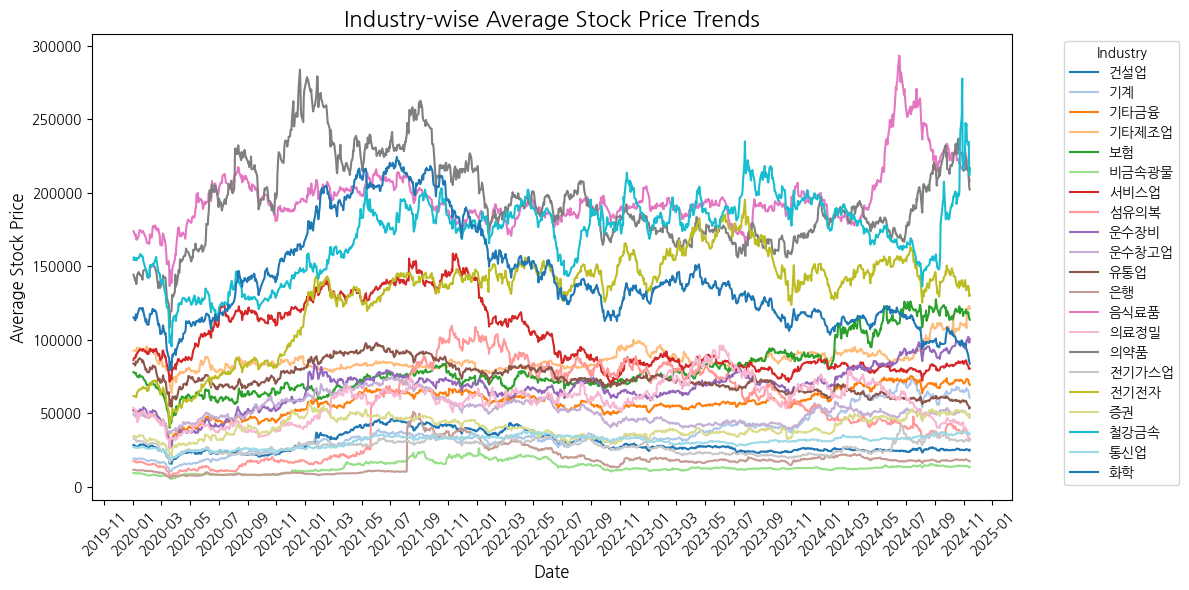

In [37]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자 데이터만 필터링
numeric_cols = merged_data.select_dtypes(include=['number']).columns
groupby_cols = ['industry', '날짜']
numeric_cols = list(set(numeric_cols) - set(groupby_cols))  # 그룹화 컬럼 제외
industry_price_trends = merged_data[groupby_cols + numeric_cols].groupby(['industry', '날짜']).mean().reset_index()

# 날짜를 datetime 형식으로 변환
industry_price_trends['날짜'] = pd.to_datetime(industry_price_trends['날짜'])

# 산업별 고유 색상 생성
unique_industries = industry_price_trends['industry'].unique()
colors = sns.color_palette("tab20", len(unique_industries))
industry_colors = dict(zip(unique_industries, colors))

# 시각화: 산업별 평균 종가
plt.figure(figsize=(12, 6))
for industry in unique_industries:
    industry_data = industry_price_trends[industry_price_trends['industry'] == industry]
    plt.plot(industry_data['날짜'], industry_data['종가'], label=industry, color=industry_colors[industry])

# X축 레이블 포맷 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 그래프 제목과 레이블 설정
plt.title("Industry-wise Average Stock Price Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Stock Price", fontsize=12)

# 범례 설정
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')

# X축 레이블 회전 및 레이아웃 조정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()



시가총액 가중치 반영 주가

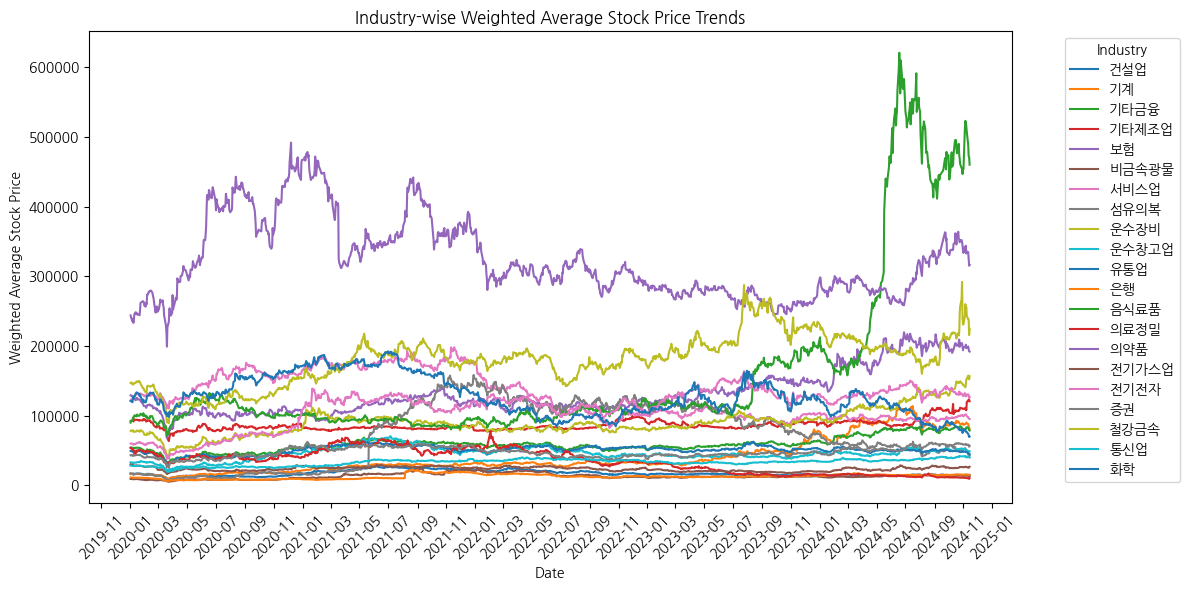

In [24]:
# 데이터 로드
stock_data = pd.read_csv('kospi_200_stock_data.csv')  # 2020~2024 주가 데이터
corp_data = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목별 시가총액 포함

# 종목별 시가총액 병합
stock_data = pd.merge(stock_data, corp_data[['stock_code', 'industry', 'market_cap']], on='stock_code', how='left')

# 그룹화하여 시가총액 합 계산
market_cap_sum = stock_data.groupby(['날짜', 'industry'])['market_cap'].sum().reset_index()
market_cap_sum = market_cap_sum.rename(columns={'market_cap': 'total_market_cap'})

# 원본 데이터에 시가총액 합 병합
stock_data = pd.merge(stock_data, market_cap_sum, on=['날짜', 'industry'], how='left')

# 시가총액 비율 계산
stock_data['시가총액_비율'] = stock_data['market_cap'] / stock_data['total_market_cap']

# 시가총액 가중 평균 주가 계산
stock_data['가중평균_주가'] = stock_data['종가'] * stock_data['시가총액_비율']
industry_weighted_price = stock_data.groupby(['날짜', 'industry'])['가중평균_주가'].sum().reset_index()

# 날짜 형식 변환
industry_weighted_price['날짜'] = pd.to_datetime(industry_weighted_price['날짜'])

# 시각화: 산업별 시가총액 가중 평균 주가
plt.figure(figsize=(12, 6))
for industry in industry_weighted_price['industry'].unique():
    industry_data = industry_weighted_price[industry_weighted_price['industry'] == industry]
    plt.plot(industry_data['날짜'], industry_data['가중평균_주가'], label=industry)

# X축 조정: 2개월 단위
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Industry-wise Weighted Average Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Weighted Average Stock Price")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

# 산업별 주요 변수와 가중치 매핑
industry_weights = {
    '음식료품': {'매출액': 0.4, '영업이익': 0.3},
    '화학': {'매출액': 0.4, '영업이익': 0.3},
    '운수장비': {'매출액': 0.4, '영업이익': 0.3},
    '전기전자': {'매출액': 0.4, '영업이익': 0.3},
    '기계': {'매출액': 0.4, '영업이익': 0.3},
    '비금속광물': {'매출액': 0.4, '영업이익': 0.3},
    '증권': {'ROE': 0.5, '영업이익률': 0.3},
    '은행': {'ROE': 0.5, '영업이익률': 0.3},
    '기타금융': {'ROE': 0.5, '영업이익률': 0.3},
    '섬유의복': {'ROE': 0.5, '영업이익률': 0.3},
    '건설업': {'부채총계': 0.4, '자산총계': 0.4},
    '운수창고업': {'부채총계': 0.4, '자산총계': 0.4},
    '의료정밀': {'부채총계': 0.4, '자산총계': 0.4},
    '서비스업': {'매출액': 0.4, '영업이익률': 0.3},
    '유통업': {'매출액': 0.4, '영업이익률': 0.3},
    '의약품': {'매출액': 0.4, '영업이익률': 0.3},
}

# 가중치를 산업별로 추가
def apply_weights(row):
    industry = row['industry']
    if industry in industry_weights:
        for key, value in industry_weights[industry].items():
            row[f'{key}_가중치'] = value
    return row

# 가중치 적용
merged_data = merged_data.apply(apply_weights, axis=1)


In [47]:

# 엑셀로 저장
output_file = 'industry_weights.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"엑셀 파일로 저장 완료: {output_file}")


엑셀 파일로 저장 완료: industry_weights.xlsx


In [44]:
merged_data

,ROE,ROE_가중치,corp_name,corp_name_x,industry,stock_code,거래량,고가,금융부채,금융상품관련순손익,...,자산_부채비율,자산총계,자산총계_가중치,저가,종가,차입부채,총포괄손익,파생상품관련손익,파생상품부채,파생상품자산
212112,NaN,NaN,하이트진로,NaN,음식료품,80,234407,29400,NaN,NaN,...,NaN,NaN,NaN,28700,28900,NaN,NaN,NaN,NaN,NaN
212113,NaN,NaN,하이트진로,NaN,음식료품,80,227376,29050,NaN,NaN,...,NaN,NaN,NaN,28450,28550,NaN,NaN,NaN,NaN,NaN
212114,NaN,NaN,하이트진로,NaN,음식료품,80,227073,28900,NaN,NaN,...,NaN,NaN,NaN,28400,28650,NaN,NaN,NaN,NaN,NaN
212115,NaN,NaN,하이트진로,NaN,음식료품,80,242789,28900,NaN,NaN,...,NaN,NaN,NaN,28400,28450,NaN,NaN,NaN,NaN,NaN
212116,NaN,NaN,하이트진로,NaN,음식료품,80,505321,28300,NaN,NaN,...,NaN,NaN,NaN,27400,27700,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,4.316509,0.5,한화인더스트리얼솔루션즈,이수스페셜티케미컬,기타금융,489790,4355514,45500,0,0,...,59.312136,2.886574e+11,NaN,42250,45450,0,"5,069,675,992",0,0,0
6028,4.316509,0.5,한화인더스트리얼솔루션즈,이수스페셜티케미컬,기타금융,489790,2692594,45550,0,0,...,59.312136,2.886574e+11,NaN,42450,43700,0,"5,069,675,992",0,0,0
6029,4.316509,0.5,한화인더스트리얼솔루션즈,이수스페셜티케미컬,기타금융,489790,2566967,44750,0,0,...,59.312136,2.886574e+11,NaN,41600,41900,0,"5,069,675,992",0,0,0
6030,4.316509,0.5,한화인더스트리얼솔루션즈,이수스페셜티케미컬,기타금융,489790,2014607,43150,0,0,...,59.312136,2.886574e+11,NaN,38500,38550,0,"5,069,675,992",0,0,0


In [48]:
import pandas as pd

# 데이터 로드
stock_data = pd.read_csv('kospi_200_stock_data.csv')  # 주가 데이터
financial_data = pd.read_csv('filtered_financial_pivot.csv')  # 재무제표 데이터
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목명, 시가총액, 산업 정보 포함

# 데이터 병합 (종목 코드 기준으로 병합)
merged_data = pd.merge(stock_data, financial_data, on=['stock_code', '날짜'], how='left')
merged_data = pd.merge(merged_data, kospi_200[['stock_code', 'industry', 'market_cap']], on='stock_code', how='left')

# 날짜 오름차순으로 정렬
merged_data = merged_data.sort_values(by=['stock_code', '날짜'])

# 결측값을 forward fill로 채움
merged_data.fillna(method='ffill', inplace=True)

# **산업별 시가총액 계산 (중복 제거)** - 산업별 시가총액 합계 계산은 한 번만 수행
unique_market_cap = kospi_200.groupby('industry')['market_cap'].sum()

# 단순 가중치 계산 (시가총액 기반)
merged_data['단순_가중치'] = merged_data.apply(
    lambda row: row['market_cap'] / unique_market_cap[row['industry']]
    if unique_market_cap[row['industry']] > 0 else 0,
    axis=1
)

# 산업별 주요 변수와 가중치 매핑
industry_weights = {
    '음식료품': {'매출액': 0.4, '영업이익': 0.3},
    '화학': {'매출액': 0.4, '영업이익': 0.3},
    '운수장비': {'매출액': 0.4, '영업이익': 0.3},
    '전기전자': {'매출액': 0.4, '영업이익': 0.3},
    '기계': {'매출액': 0.4, '영업이익': 0.3},
    '비금속광물': {'매출액': 0.4, '영업이익': 0.3},
    '증권': {'ROE': 0.5, '영업이익률': 0.3},
    '은행': {'ROE': 0.5, '영업이익률': 0.3},
    '기타금융': {'ROE': 0.5, '영업이익률': 0.3},
    '섬유의복': {'ROE': 0.5, '영업이익률': 0.3},
    '건설업': {'부채총계': 0.4, '자산총계': 0.4},
    '운수창고업': {'부채총계': 0.4, '자산총계': 0.4},
    '의료정밀': {'부채총계': 0.4, '자산총계': 0.4},
    '서비스업': {'매출액': 0.4, '영업이익률': 0.3},
    '유통업': {'매출액': 0.4, '영업이익률': 0.3},
    '의약품': {'매출액': 0.4, '영업이익률': 0.3},
}

# 세부 가중치 계산
def calculate_detailed_weights(row):
    industry = row['industry']
    if industry in industry_weights:
        detailed_weight = 0
        for key, value in industry_weights[industry].items():
            if key in row and pd.notna(row[key]):
                detailed_weight += value * row[key]
        return detailed_weight
    return 0

merged_data['세부_가중치'] = merged_data.apply(calculate_detailed_weights, axis=1)

# 최종 가중치 계산
merged_data['최종_가중치'] = 0.5 * merged_data['단순_가중치'] + 0.5 * merged_data['세부_가중치']

# **중복 제거된 산업별 시가총액 기반으로 계산 결과를 저장**
output_file = 'final_combined_weights.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"최종 가중치 계산 완료: {output_file}")



<ipython-input-48-c66468e92b29>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


최종 가중치 계산 완료: final_combined_weights.xlsx


In [55]:
import pandas as pd

# 데이터 로드
stock_data = pd.read_csv('kospi_200_stock_data.csv')  # 주가 및 거래량 데이터
kospi_200 = pd.read_csv('merged_kospi_200_corp_list.csv')  # 종목명, 시가총액, 산업 정보 포함

# 산업별 시가총액 합계 계산
industry_market_cap = kospi_200.groupby('industry')['market_cap'].sum()

# 산업별 거래량 합계를 위해 데이터 병합
merged_data = pd.merge(stock_data, kospi_200[['stock_code', 'industry', 'market_cap']], on='stock_code', how='left')

# 산업별 거래량 합계 계산
industry_volume = merged_data.groupby(['industry', '날짜'])['거래량'].sum()

# 시가총액 기반 가중치 계산
merged_data['market_cap_weight'] = merged_data.apply(
    lambda row: row['market_cap'] / industry_market_cap[row['industry']] if industry_market_cap[row['industry']] > 0 else 0,
    axis=1
)

# 거래량 기반 가중치 계산
merged_data['volume_weight'] = merged_data.apply(
    lambda row: row['거래량'] / industry_volume[(row['industry'], row['날짜'])]
    if industry_volume[(row['industry'], row['날짜'])] > 0 else 0,
    axis=1
)

# 통합 데이터 저장
merged_data[['stock_code', 'industry', '날짜', 'market_cap', '거래량', 'market_cap_weight', 'volume_weight']].to_csv(
    'combined_weights_with_date.csv', index=False, encoding='utf-8-sig'
)
print("통합 가중치 저장 완료 (날짜 포함): combined_weights_with_date.csv")




통합 가중치 저장 완료 (날짜 포함): combined_weights_with_date.csv
